In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
# import seaborn as sns
from linearmodels.panel import PanelOLS
from linearmodels.panel import compare
import datetime
import pickle

# 데이터 읽기 및 전처리
cond3_treat_0_1 = pd.read_csv("../../data/treat_0_1_condition3.csv")
cond3_treat_0_2 = pd.read_csv("../../data/treat_0_2_condition3.csv")
cond3_treat_0_3 = pd.read_csv("../../data/treat_0_3_condition3.csv")
cond3_treat_0_4 = pd.read_csv("../../data/treat_0_4_condition3.csv")

cond3_treat_1_1 = pd.read_csv("../../data/treat_1_1_condition3.csv")
cond3_treat_1_2 = pd.read_csv("../../data/treat_1_2_condition3.csv")
cond3_treat_1_3 = pd.read_csv("../../data/treat_1_3_condition3.csv")
cond3_treat_1_4 = pd.read_csv("../../data/treat_1_4_condition3.csv")

# 데이터 읽기 및 전처리
df_topic_day = pd.read_csv("../../R/data/topic_day_panel.csv")

전처리

In [2]:

cond3_sede = pd.concat([  cond3_treat_0_1
                        , cond3_treat_0_2
                        , cond3_treat_1_1
                        , cond3_treat_1_2], axis = 0)

cond3_long_sede = pd.concat([ cond3_treat_0_1
                            , cond3_treat_0_2
                            , cond3_treat_0_3
                            , cond3_treat_0_4
                            , cond3_treat_1_1
                            , cond3_treat_1_2
                            , cond3_treat_1_3
                            , cond3_treat_1_4], axis = 0)

In [3]:
cond3_sede = cond3_sede.melt(id_vars = ['cdate', 'del_yn'], value_vars=cond3_sede.columns[1:])
cond3_long_sede = cond3_long_sede.melt(id_vars = ['cdate', 'del_yn'], value_vars=cond3_long_sede.columns[1:])

In [4]:
cond3_long_sede[cond3_long_sede['variable'] =='python']

,cdate,del_yn,variable,value
0,2021-10-09 00:00:00,0,python,517
1,2021-10-12 00:00:00,0,python,864
2,2021-10-15 00:00:00,0,python,756
3,2021-10-18 00:00:00,0,python,766
4,2021-11-10 00:00:00,0,python,844
...,...,...,...,...
1059,2023-06-07 00:00:00,0,python,458
1060,2023-06-10 00:00:00,0,python,240
1061,2023-06-02 00:00:00,1,python,171
1062,2023-06-05 00:00:00,1,python,165


In [5]:
cond3_sede['cdate'] = pd.to_datetime(cond3_sede['cdate'])
cond3_long_sede['cdate'] = pd.to_datetime(cond3_long_sede['cdate'])
df_topic_day['date'] = pd.to_datetime(df_topic_day['date'])

In [6]:

cond3_sede.columns = ['cdate', 'del_yn', 'sede_tag', 'sede_q_count']
cond3_long_sede.columns = ['cdate', 'del_yn', 'sede_tag', 'sede_q_count']


In [7]:

cond3_sede.loc[cond3_sede['sede_tag'] =='net', 'sede_tag']='.net'
cond3_long_sede.loc[cond3_long_sede['sede_tag'] =='net', 'sede_tag']='.net'



In [8]:


cond3_sede_y = cond3_sede.loc[cond3_sede['del_yn'] ==1, ['cdate', 'sede_tag', 'sede_q_count']]
cond3_sede_n = cond3_sede.loc[cond3_sede['del_yn'] ==0, ['cdate', 'sede_tag', 'sede_q_count']]


cond3_long_sede_y = cond3_long_sede.loc[cond3_long_sede['del_yn'] ==1, ['cdate', 'sede_tag', 'sede_q_count']]
cond3_long_sede_n = cond3_long_sede.loc[cond3_long_sede['del_yn'] ==0, ['cdate', 'sede_tag', 'sede_q_count']]




In [9]:
cond3_sede_yn = cond3_sede.groupby(['cdate', 'sede_tag']).sum()[['sede_q_count']].reset_index()
cond3_long_sede_yn = cond3_long_sede.groupby(['cdate', 'sede_tag']).sum()[['sede_q_count']].reset_index()

In [10]:
# cond3_long_sede_y['cdate'] = pd.to_datetime(cond3_long_sede_y['cdate'])
# cond3_long_sede_n['cdate'] = pd.to_datetime(cond3_long_sede_n['cdate'])
# cond3_long_sede_yn['cdate'] = pd.to_datetime(cond3_long_sede_yn['cdate'])



In [11]:
# treat_0_1_condition1.csv
# cast(creationdate as date) between '2021-10-06' and '2021-12-31'
# treat_0_2_condition1.csv
# cast(creationdate as date) between '2022-01-01' and '2022-03-15'
# treat_1_1_condition1.csv
# cast(creationdate as date) between '2022-10-05' and '2022-12-31'
# treat_1_2_condition1.csv
# cast(creationdate as date) between '2023-01-01' and '2023-03-14'


###################################################################################condition3
cond9  = cond3_sede_yn['cdate']>='2021-10-06'
cond10 = cond3_sede_yn['cdate']<='2022-03-15'
cond11 = cond3_sede_yn['cdate']>='2022-10-05'
cond12 = cond3_sede_yn['cdate']<='2023-03-14'


cond13  = cond3_sede_y['cdate']>='2021-10-06'
cond14 = cond3_sede_y['cdate']<='2022-03-15'
cond15 = cond3_sede_y['cdate']>='2022-10-05'
cond16 = cond3_sede_y['cdate']<='2023-03-14'


cond17  = cond3_sede_n['cdate']>='2021-10-06'
cond18 = cond3_sede_n['cdate']<='2022-03-15'
cond19 = cond3_sede_n['cdate']>='2022-10-05'
cond20 = cond3_sede_n['cdate']<='2023-03-14'


###################################################################################condition3_long
cond45  = cond3_long_sede_yn['cdate']>='2021-10-06'
cond46 = cond3_long_sede_yn['cdate']<='2022-06-28'
cond47 = cond3_long_sede_yn['cdate']>='2022-10-05'
cond48 = cond3_long_sede_yn['cdate']<='2023-06-27'


cond49  = cond3_long_sede_y['cdate']>='2021-10-06'
cond50  = cond3_long_sede_y['cdate']<='2022-06-28'
cond51  = cond3_long_sede_y['cdate']>='2022-10-05'
cond52  = cond3_long_sede_y['cdate']<='2023-06-27'


cond53  = cond3_long_sede_n['cdate']>='2021-10-06'
cond54  = cond3_long_sede_n['cdate']<='2022-06-28'
cond55  = cond3_long_sede_n['cdate']>='2022-10-05'
cond56  = cond3_long_sede_n['cdate']<='2023-06-27'


In [12]:
###################################################################################condition3
cond3_sede_yn.loc[(cond9&cond10),  'rel_days'] = cond3_sede_yn.loc[(cond9&cond10),  'cdate'] - datetime.datetime(2021,12,1)
cond3_sede_yn.loc[(cond11&cond12), 'rel_days'] = cond3_sede_yn.loc[(cond11&cond12), 'cdate'] - datetime.datetime(2022,11,30)


cond3_sede_y.loc[(cond13&cond14),  'rel_days'] = cond3_sede_y.loc[(cond13&cond14),  'cdate'] - datetime.datetime(2021,12,1)
cond3_sede_y.loc[(cond15&cond16), 'rel_days'] = cond3_sede_y.loc[(cond15&cond16), 'cdate'] - datetime.datetime(2022,11,30)

cond3_sede_n.loc[(cond17&cond18),  'rel_days'] = cond3_sede_n.loc[(cond17&cond18),  'cdate'] - datetime.datetime(2021,12,1)
cond3_sede_n.loc[(cond19&cond20), 'rel_days'] =  cond3_sede_n.loc[(cond19&cond20), 'cdate'] - datetime.datetime(2022,11,30)

###################################################################################condition3_long
cond3_long_sede_yn.loc[(cond45&cond46),  'rel_days'] = cond3_long_sede_yn.loc[(cond45&cond46),  'cdate'] - datetime.datetime(2021,12,1)
cond3_long_sede_yn.loc[(cond47&cond48), 'rel_days']  = cond3_long_sede_yn.loc[(cond47&cond48), 'cdate'] - datetime.datetime(2022,11,30)


cond3_long_sede_y.loc[(cond49&cond50),  'rel_days'] = cond3_long_sede_y.loc[(cond49&cond50),  'cdate'] - datetime.datetime(2021,12,1)
cond3_long_sede_y.loc[(cond51&cond52), 'rel_days']  = cond3_long_sede_y.loc[(cond51&cond52), 'cdate'] - datetime.datetime(2022,11,30)

cond3_long_sede_n.loc[(cond53&cond54),  'rel_days'] = cond3_long_sede_n.loc[(cond53&cond54),  'cdate'] - datetime.datetime(2021,12,1)
cond3_long_sede_n.loc[(cond55&cond56), 'rel_days']  = cond3_long_sede_n.loc[(cond55&cond56), 'cdate'] - datetime.datetime(2022,11,30)


In [13]:
###################################################################################condition3
cond3_sede_yn.loc[(cond9&cond10), 'treat'] = 0
cond3_sede_yn.loc[(cond11&cond12), 'treat'] = 1

cond3_sede_y.loc[(cond13&cond14), 'treat'] = 0
cond3_sede_y.loc[(cond15&cond16), 'treat'] = 1

cond3_sede_n.loc[(cond17&cond18), 'treat'] = 0
cond3_sede_n.loc[(cond19&cond20), 'treat'] = 1

###################################################################################condition3_long
cond3_long_sede_yn.loc[(cond45&cond46), 'treat'] = 0
cond3_long_sede_yn.loc[(cond47&cond48), 'treat'] = 1

cond3_long_sede_y.loc[(cond49&cond50), 'treat'] = 0
cond3_long_sede_y.loc[(cond51&cond52), 'treat'] = 1

cond3_long_sede_n.loc[(cond53&cond54), 'treat'] = 0
cond3_long_sede_n.loc[(cond55&cond56), 'treat'] = 1


In [14]:
cond3_sede_n

,cdate,sede_tag,sede_q_count,rel_days,treat
0,2021-10-09,python,517,-53 days,0.0
1,2021-10-12,python,864,-50 days,0.0
2,2021-10-15,python,756,-47 days,0.0
3,2021-10-18,python,766,-44 days,0.0
4,2021-11-10,python,844,-21 days,0.0
...,...,...,...,...,...
32188,2023-01-22,linux,19,53 days,1.0
32189,2023-02-11,linux,20,73 days,1.0
32190,2023-02-14,linux,38,76 days,1.0
32191,2023-02-17,linux,23,79 days,1.0


In [15]:
###################################################################################condition3
cond3_sede_yn['rel_week'] = np.floor(cond3_sede_yn['rel_days'].dt.days/7)
cond3_sede_y['rel_week'] = np.floor(cond3_sede_y['rel_days'].dt.days/7)
cond3_sede_n['rel_week'] = np.floor(cond3_sede_n['rel_days'].dt.days/7)


###################################################################################condition3_long
cond3_long_sede_yn['rel_week'] = np.floor(cond3_long_sede_yn['rel_days'].dt.days/7)
cond3_long_sede_y['rel_week'] = np.floor(cond3_long_sede_y['rel_days'].dt.days/7)
cond3_long_sede_n['rel_week'] = np.floor(cond3_long_sede_n['rel_days'].dt.days/7)

In [16]:
cond3_sede_yn

,cdate,sede_tag,sede_q_count,rel_days,treat,rel_week
0,2021-10-06,.net,0,-56 days,0.0,-8.0
1,2021-10-06,amazon_web_services,100,-56 days,0.0,-8.0
2,2021-10-06,android,284,-56 days,0.0,-8.0
3,2021-10-06,angular,177,-56 days,0.0,-8.0
4,2021-10-06,arrays,132,-56 days,0.0,-8.0
...,...,...,...,...,...,...
16095,2023-03-14,string,23,104 days,1.0,14.0
16096,2023-03-14,swift,91,104 days,1.0,14.0
16097,2023-03-14,typescript,125,104 days,1.0,14.0
16098,2023-03-14,vba,61,104 days,1.0,14.0


In [17]:
###################################################################################condition3
cond3_sede_yn[['treat', 'rel_week']] = cond3_sede_yn[['treat', 'rel_week']].astype(int)
cond3_sede_y[['treat', 'rel_week']] = cond3_sede_y[['treat', 'rel_week']].astype(int)
cond3_sede_n[['treat', 'rel_week']] = cond3_sede_n[['treat', 'rel_week']].astype(int)

###################################################################################condition3_long
cond3_long_sede_yn[['treat', 'rel_week']] = cond3_long_sede_yn[['treat', 'rel_week']].astype(int)
cond3_long_sede_y[['treat', 'rel_week']] = cond3_long_sede_y[['treat', 'rel_week']].astype(int)
cond3_long_sede_n[['treat', 'rel_week']] = cond3_long_sede_n[['treat', 'rel_week']].astype(int)

In [18]:
cond3_long_sede_yn

,cdate,sede_tag,sede_q_count,rel_days,treat,rel_week
0,2021-10-06,.net,0,-56 days,0,-8
1,2021-10-06,amazon_web_services,100,-56 days,0,-8
2,2021-10-06,android,284,-56 days,0,-8
3,2021-10-06,angular,177,-56 days,0,-8
4,2021-10-06,arrays,132,-56 days,0,-8
...,...,...,...,...,...,...
26595,2023-06-27,string,20,209 days,1,29
26596,2023-06-27,swift,50,209 days,1,29
26597,2023-06-27,typescript,102,209 days,1,29
26598,2023-06-27,vba,45,209 days,1,29


In [19]:
# rel_week을 범주형 변수로 변환 (주차별 처리)
###################################################################################condition3
cond3_sede_yn['rel_week'] = pd.Categorical(cond3_sede_yn['rel_week'])
cond3_sede_y['rel_week'] = pd.Categorical(cond3_sede_y['rel_week'])
cond3_sede_n['rel_week'] = pd.Categorical(cond3_sede_n['rel_week'])

###################################################################################condition3_long
cond3_long_sede_yn['rel_week'] = pd.Categorical(cond3_long_sede_yn['rel_week'])
cond3_long_sede_y['rel_week'] = pd.Categorical(cond3_long_sede_y['rel_week'])
cond3_long_sede_n['rel_week'] = pd.Categorical(cond3_long_sede_n['rel_week'])

df_topic_day['rel_week'] = pd.Categorical(df_topic_day['rel_week'])


In [20]:
# .net의 경우 데이터가 비어있어 분석에서 제외

###################################################################################condition3
cond3_sede_yn = cond3_sede_yn[cond3_sede_yn['sede_tag'] != '.net']
cond3_sede_y = cond3_sede_y[cond3_sede_y['sede_tag'] != '.net']
cond3_sede_n = cond3_sede_n[cond3_sede_n['sede_tag'] != '.net']


###################################################################################condition3_long
cond3_long_sede_yn = cond3_long_sede_yn[cond3_long_sede_yn['sede_tag'] != '.net']
cond3_long_sede_y = cond3_long_sede_y[cond3_long_sede_y['sede_tag'] != '.net']
cond3_long_sede_n = cond3_long_sede_n[cond3_long_sede_n['sede_tag'] != '.net']


df_topic_day = df_topic_day[df_topic_day['tag'] != '.net']


In [21]:
cond3_sede_n = cond3_sede_n.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])
cond3_sede_y = cond3_sede_y.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])
cond3_sede_yn = cond3_sede_yn.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])

In [22]:
cond3_long_sede_n  = cond3_long_sede_n.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])
cond3_long_sede_y  = cond3_long_sede_y.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])
cond3_long_sede_yn = cond3_long_sede_yn.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])

In [23]:
###################################################################################condition3
cond3_sede_yn = cond3_sede_yn.set_index(['sede_tag', 'cdate'])
cond3_sede_y = cond3_sede_y.set_index(['sede_tag', 'cdate'])
cond3_sede_n = cond3_sede_n.set_index(['sede_tag', 'cdate'])


###################################################################################condition3_long
cond3_long_sede_yn = cond3_long_sede_yn.set_index(['sede_tag', 'cdate'])
cond3_long_sede_y = cond3_long_sede_y.set_index(['sede_tag', 'cdate'])
cond3_long_sede_n = cond3_long_sede_n.set_index(['sede_tag', 'cdate'])


df_topic_day = df_topic_day.set_index(['tag', 'date'])


In [24]:
cond3_long_sede_n

sede_q_count rel_days  treat rel_week
sede_tag            cdate                                            
amazon_web_services 2021-10-06            77 -56 days      0       -8
                    2021-10-07            62 -55 days      0       -8
                    2021-10-08            70 -54 days      0       -8
                    2021-10-09            33 -53 days      0       -8
                    2021-10-10            28 -52 days      0       -8
...                                      ...      ...    ...      ...
vuejs               2023-06-23            19 205 days      1       29
                    2023-06-24            12 206 days      1       29
                    2023-06-25            14 207 days      1       29
                    2023-06-26            19 208 days      1       29
                    2023-06-27            19 209 days      1       29

[26068 rows x 4 columns]

### 모델적용

In [25]:
periods = np.arange(-7, 15, 1)

#### Q1.

##### Target 

In [26]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
mod_quest_vol_so_dyn = PanelOLS.from_formula('q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=df_topic_day)
result_dyn = mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [27]:
# 동적 효과 계수 추출
coefs = result_dyn.params
std_errors = result_dyn.std_errors
conf_int = result_dyn.conf_int()

In [28]:
coefs_filtered      = coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
std_errors_filtered = std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values

In [29]:
# 신뢰구간 계산
ll_95 = coefs_filtered - 1.965 * std_errors_filtered
ul_95 = coefs_filtered + 1.965 * std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : coefs_filtered,
    'll_95'     : ll_95,
    'ul_95'     : ul_95
})

##### Condition3

In [30]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_sede_yn)
cond3_result_dyn = cond3_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [31]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_y_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_sede_y)
cond3_y_result_dyn = cond3_y_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [32]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_n_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_sede_n)
cond3_n_result_dyn = cond3_n_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [33]:
cond3_sede_y

sede_q_count rel_days  treat rel_week
sede_tag            cdate                                            
amazon_web_services 2021-10-06            23 -56 days      0       -8
                    2021-10-07            21 -55 days      0       -8
                    2021-10-08            17 -54 days      0       -8
                    2021-10-09             9 -53 days      0       -8
                    2021-10-10             7 -52 days      0       -8
...                                      ...      ...    ...      ...
vuejs               2023-03-10            10 100 days      1       14
                    2023-03-11             8 101 days      1       14
                    2023-03-12             8 102 days      1       14
                    2023-03-13            15 103 days      1       14
                    2023-03-14             8 104 days      1       14

[15778 rows x 4 columns]

In [34]:
cond3_sede_n

sede_q_count rel_days  treat rel_week
sede_tag            cdate                                            
amazon_web_services 2021-10-06            77 -56 days      0       -8
                    2021-10-07            62 -55 days      0       -8
                    2021-10-08            70 -54 days      0       -8
                    2021-10-09            33 -53 days      0       -8
                    2021-10-10            28 -52 days      0       -8
...                                      ...      ...    ...      ...
vuejs               2023-03-10            35 100 days      1       14
                    2023-03-11            18 101 days      1       14
                    2023-03-12            21 102 days      1       14
                    2023-03-13            43 103 days      1       14
                    2023-03-14            46 104 days      1       14

[15778 rows x 4 columns]

In [35]:
# 동적 효과 계수 추출
cond3_coefs = cond3_result_dyn.params
cond3_std_errors = cond3_result_dyn.std_errors
cond3_conf_int = cond3_result_dyn.conf_int()

In [36]:
# 동적 효과 계수 추출
cond3_y_coefs       = cond3_y_result_dyn.params
cond3_y_std_errors  = cond3_y_result_dyn.std_errors
cond3_y_conf_int    = cond3_y_result_dyn.conf_int()

In [37]:
# 동적 효과 계수 추출
cond3_n_coefs       = cond3_n_result_dyn.params
cond3_n_std_errors  = cond3_n_result_dyn.std_errors
cond3_n_conf_int    = cond3_n_result_dyn.conf_int()

In [38]:
cond3_coefs_filtered      = cond3_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond3_std_errors_filtered = cond3_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [39]:
cond3_y_coefs_filtered      = cond3_y_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond3_y_std_errors_filtered = cond3_y_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values



In [40]:
cond3_n_coefs_filtered      = cond3_n_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond3_n_std_errors_filtered = cond3_n_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [41]:
# 신뢰구간 계산
cond3_ll_95 = cond3_coefs_filtered - 1.965 * cond3_std_errors_filtered
cond3_ul_95 = cond3_coefs_filtered + 1.965 * cond3_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond3_coefs_filtered,
    'll_95'     : cond3_ll_95,
    'ul_95'     : cond3_ul_95
})

In [42]:
# 신뢰구간 계산
cond3_y_ll_95 = cond3_y_coefs_filtered - 1.965 * cond3_y_std_errors_filtered
cond3_y_ul_95 = cond3_y_coefs_filtered + 1.965 * cond3_y_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_y_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond3_y_coefs_filtered,
    'll_95'     : cond3_y_ll_95,
    'ul_95'     : cond3_y_ul_95
})

In [43]:
# 신뢰구간 계산
cond3_n_ll_95 = cond3_n_coefs_filtered - 1.965 * cond3_n_std_errors_filtered
cond3_n_ul_95 = cond3_n_coefs_filtered + 1.965 * cond3_n_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_n_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond3_n_coefs_filtered,
    'll_95'     : cond3_n_ll_95,
    'ul_95'     : cond3_n_ul_95
})

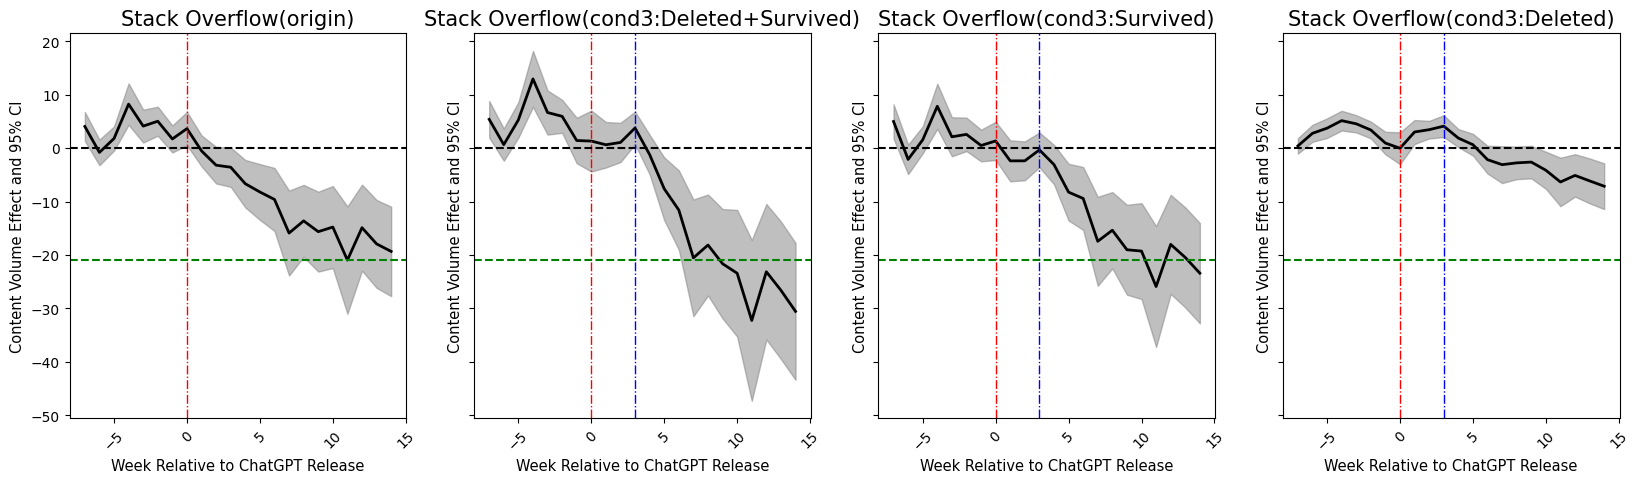

In [44]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 4, figsize = (20, 5), sharey=sharey, sharex=sharex)


axs[0].fill_between(df_coefs['period'], df_coefs['ll_95'], df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(df_coefs['period'], df_coefs['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[0].axhline(y=0,     color='black',  linestyle='--')
axs[0].axhline(y=-20.9, color='green',  linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[0].set_title("Stack Overflow(origin)", fontsize=15)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)

axs[1].fill_between(cond3_df_coefs['period'], cond3_df_coefs['ll_95'], cond3_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond3_df_coefs['period'], cond3_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[1].axhline(y=0,     color='black',  linestyle='--')
axs[1].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[1].axhline(y=-20.9, color='green',  linestyle='--')
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[1].set_title("Stack Overflow(cond3:Deleted+Survived)", fontsize=15)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)


axs[2].fill_between(cond3_n_df_coefs['period'], cond3_n_df_coefs['ll_95'], cond3_n_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond3_n_df_coefs['period'], cond3_n_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[2].axhline(y=-20.9, color='green',  linestyle='--')
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[2].set_title("Stack Overflow(cond3:Survived)", fontsize=15)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)

axs[3].fill_between(cond3_y_df_coefs['period'], cond3_y_df_coefs['ll_95'], cond3_y_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[3].plot(cond3_y_df_coefs['period'], cond3_y_df_coefs['Estimate'], color='black', linewidth=2)
axs[3].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[3].axhline(y=0, color='black', linestyle='--')
axs[3].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[3].axhline(y=-20.9, color='green',  linestyle='--')
axs[3].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[3].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[3].set_title("Stack Overflow(cond3:Deleted)", fontsize=15)
axs[3].tick_params(axis='x', rotation=45)
axs[3].grid(False)



plt.show();

##### Condition3_long

In [45]:
long_periods = np.arange(-7, 30, 1)

In [46]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_long_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_long_sede_yn)
cond3_long_result_dyn = cond3_long_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [47]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_long_y_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_long_sede_y)
cond3_long_y_result_dyn = cond3_long_y_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [48]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_long_n_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_long_sede_n)
cond3_long_n_result_dyn = cond3_long_n_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [49]:
# 동적 효과 계수 추출
cond3_long_coefs         = cond3_long_result_dyn.params
cond3_long_std_errors    = cond3_long_result_dyn.std_errors
cond3_long_conf_int      = cond3_long_result_dyn.conf_int()

In [50]:
# 동적 효과 계수 추출
cond3_long_y_coefs       = cond3_long_y_result_dyn.params
cond3_long_y_std_errors  = cond3_long_y_result_dyn.std_errors
cond3_long_y_conf_int    = cond3_long_y_result_dyn.conf_int()

In [51]:
# 동적 효과 계수 추출
cond3_long_n_coefs       = cond3_long_n_result_dyn.params
cond3_long_n_std_errors  = cond3_long_n_result_dyn.std_errors
cond3_long_n_conf_int    = cond3_long_n_result_dyn.conf_int()

In [52]:
cond3_long_sede_y

sede_q_count rel_days  treat rel_week
sede_tag            cdate                                            
amazon_web_services 2021-10-06            23 -56 days      0       -8
                    2021-10-07            21 -55 days      0       -8
                    2021-10-08            17 -54 days      0       -8
                    2021-10-09             9 -53 days      0       -8
                    2021-10-10             7 -52 days      0       -8
...                                      ...      ...    ...      ...
vuejs               2023-06-23             3 205 days      1       29
                    2023-06-24             2 206 days      1       29
                    2023-06-25             6 207 days      1       29
                    2023-06-26             8 208 days      1       29
                    2023-06-27             8 209 days      1       29

[26068 rows x 4 columns]

In [53]:
cond3_long_coefs

C(rel_week)[T.-8]          158.186589
C(rel_week)[T.-7]          157.895044
C(rel_week)[T.-6]          161.886297
C(rel_week)[T.-5]          154.119534
C(rel_week)[T.-4]          154.871720
                              ...    
C(rel_week)[T.25]:treat    -55.909621
C(rel_week)[T.26]:treat    -54.338192
C(rel_week)[T.27]:treat    -59.425656
C(rel_week)[T.28]:treat    -53.644315
C(rel_week)[T.29]:treat    -57.755102
Name: parameter, Length: 76, dtype: float64

In [54]:
cond3_long_coefs_filtered      = cond3_long_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in long_periods]].values
cond3_long_std_errors_filtered = cond3_long_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in long_periods]].values


In [55]:
cond3_long_y_coefs

C(rel_week)[T.-8]          49.233236
C(rel_week)[T.-7]          49.562682
C(rel_week)[T.-6]          47.545190
C(rel_week)[T.-5]          45.778426
C(rel_week)[T.-4]          45.886297
                             ...    
C(rel_week)[T.25]:treat   -14.355685
C(rel_week)[T.26]:treat   -17.157434
C(rel_week)[T.27]:treat   -19.827988
C(rel_week)[T.28]:treat   -17.276968
C(rel_week)[T.29]:treat   -18.848397
Name: parameter, Length: 76, dtype: float64

In [56]:
cond3_long_y_coefs_filtered      = cond3_long_y_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in long_periods]].values
cond3_long_y_std_errors_filtered = cond3_long_y_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in long_periods]].values



In [57]:
cond3_long_n_coefs_filtered      = cond3_long_n_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in long_periods]].values
cond3_long_n_std_errors_filtered = cond3_long_n_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in long_periods]].values


In [58]:
# 신뢰구간 계산
cond3_long_ll_95 = cond3_long_coefs_filtered - 1.965 * cond3_long_std_errors_filtered
cond3_long_ul_95 = cond3_long_coefs_filtered + 1.965 * cond3_long_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_long_df_coefs = pd.DataFrame({
    'period'    : long_periods,
    'Estimate'  : cond3_long_coefs_filtered,
    'll_95'     : cond3_long_ll_95,
    'ul_95'     : cond3_long_ul_95
})

In [59]:
# 신뢰구간 계산
cond3_long_y_ll_95 = cond3_long_y_coefs_filtered - 1.965 * cond3_long_y_std_errors_filtered
cond3_long_y_ul_95 = cond3_long_y_coefs_filtered + 1.965 * cond3_long_y_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_long_y_df_coefs = pd.DataFrame({
    'period'    : long_periods,
    'Estimate'  : cond3_long_y_coefs_filtered,
    'll_95'     : cond3_long_y_ll_95,
    'ul_95'     : cond3_long_y_ul_95
})

In [60]:
# 신뢰구간 계산
cond3_long_n_ll_95 = cond3_long_n_coefs_filtered - 1.965 * cond3_long_n_std_errors_filtered
cond3_long_n_ul_95 = cond3_long_n_coefs_filtered + 1.965 * cond3_long_n_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_long_n_df_coefs = pd.DataFrame({
    'period'    : long_periods,
    'Estimate'  : cond3_long_n_coefs_filtered,
    'll_95'     : cond3_long_n_ll_95,
    'ul_95'     : cond3_long_n_ul_95
})

In [61]:
cond3_long_df_coefs

,period,Estimate,ll_95,ul_95
0,-7,5.379009,1.946479,8.811538
1,-6,0.644315,-2.374954,3.663583
2,-5,5.268222,1.952879,8.583564
3,-4,12.950437,7.716587,18.184287
4,-3,6.653061,2.523282,10.782840
5,-2,5.944606,2.856868,9.032344
6,-1,1.413994,-2.842547,5.670535
7,0,1.309038,-4.397524,7.015599
8,1,0.618076,-3.639356,4.875507
9,2,1.055394,-2.618970,4.729757


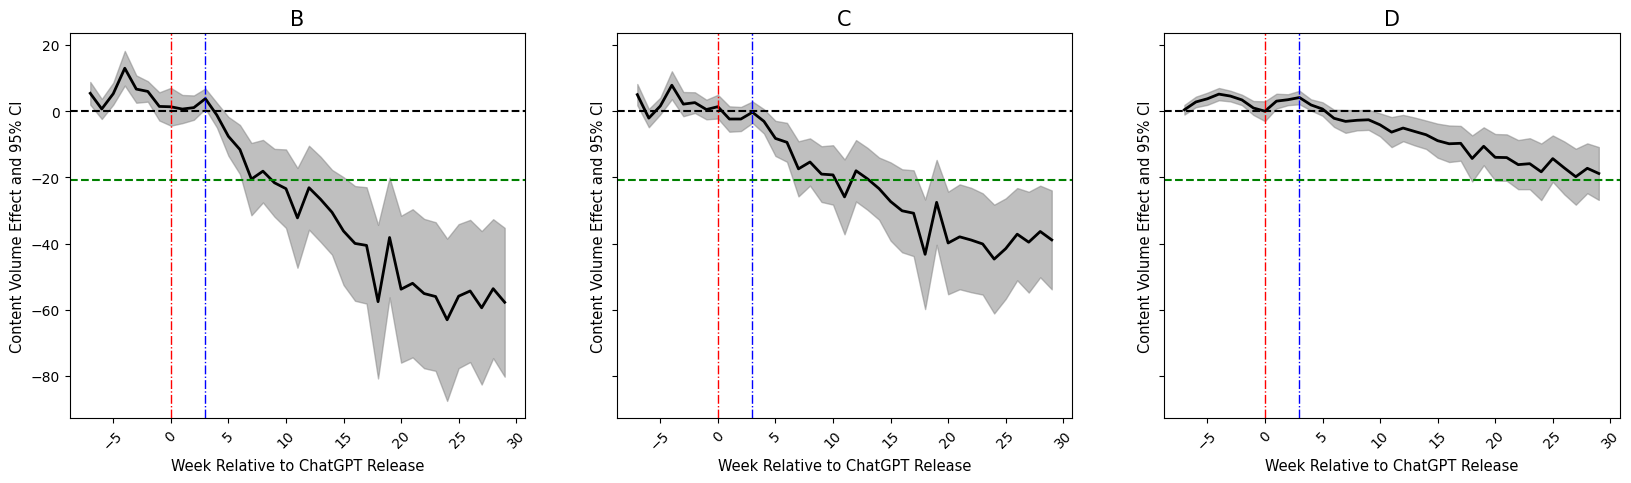

In [62]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 3, figsize = (20, 5), sharey=sharey, sharex=True)

axs[0].fill_between(cond3_long_df_coefs['period'], cond3_long_df_coefs['ll_95'], cond3_long_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(cond3_long_df_coefs['period'], cond3_long_df_coefs['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[0].axhline(y=0,     color='black',  linestyle='--')
axs[0].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[0].axhline(y=-20.9, color='green',  linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[0].set_title("B", fontsize=15)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)


axs[1].fill_between(cond3_long_n_df_coefs['period'], cond3_long_n_df_coefs['ll_95'], cond3_long_n_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond3_long_n_df_coefs['period'], cond3_long_n_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[1].axhline(y=-20.9, color='green',  linestyle='--')
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[1].set_title("C", fontsize=15)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)

axs[2].fill_between(cond3_long_y_df_coefs['period'], cond3_long_y_df_coefs['ll_95'], cond3_long_y_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond3_long_y_df_coefs['period'], cond3_long_y_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[2].axhline(y=-20.9, color='green',  linestyle='--')
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[2].set_title("D", fontsize=15)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)



plt.show();

In [63]:
df_es = pd.concat([df_coefs['Estimate'], cond3_n_df_coefs['Estimate']], axis = 1)
df_es.columns = ['origin_es', 'cond3_es']

In [64]:
corr_value = np.round(df_es.corr(method='spearman').iloc[0, 1], 2)
corr_value = str(corr_value)[1:]

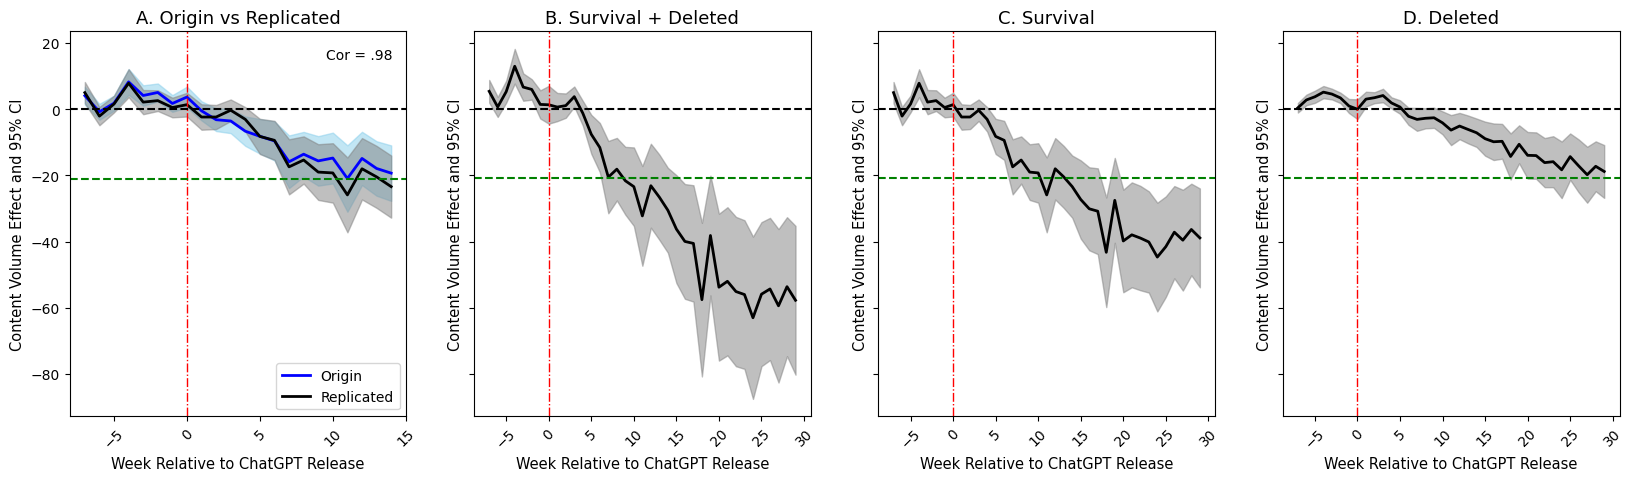

In [65]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 4, figsize = (20, 5), sharey=sharey, sharex=False)


axs[0].fill_between(df_coefs['period'], df_coefs['ll_95'], df_coefs['ul_95'], color='skyblue', alpha=0.5)
axs[0].plot(df_coefs['period'], df_coefs['Estimate'], color='blue', linewidth=2, label='Origin')

axs[0].fill_between(cond3_n_df_coefs['period'], cond3_n_df_coefs['ll_95'], cond3_n_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(cond3_n_df_coefs['period'], cond3_n_df_coefs['Estimate'], color='black', linewidth=2, label='Replicated')

axs[0].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[0].axhline(y=0,     color='black',  linestyle='--')
axs[0].axhline(y=-21, color='green',  linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[0].set_title("A. Origin vs Replicated", fontsize=13)
axs[0].tick_params(axis='x', rotation=45)

axs[0].text(9.5, 15, s='Cor = '+corr_value) #
axs[0].legend(loc = 'lower right', fontsize = 10, ncols = 1) # add legend
axs[0].grid(False)


axs[1].fill_between(cond3_long_df_coefs['period'], cond3_long_df_coefs['ll_95'], cond3_long_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond3_long_df_coefs['period'], cond3_long_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[1].axhline(y=0,     color='black',  linestyle='--')
axs[1].axhline(y=-20.9, color='green',  linestyle='--')
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[1].set_title("B. Survival + Deleted", fontsize=13)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)


axs[2].fill_between(cond3_long_n_df_coefs['period'], cond3_long_n_df_coefs['ll_95'], cond3_long_n_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond3_long_n_df_coefs['period'], cond3_long_n_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].axhline(y=-20.9, color='green',  linestyle='--')
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[2].set_title("C. Survival", fontsize=13)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)

axs[3].fill_between(cond3_long_y_df_coefs['period'], cond3_long_y_df_coefs['ll_95'], cond3_long_y_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[3].plot(cond3_long_y_df_coefs['period'], cond3_long_y_df_coefs['Estimate'], color='black', linewidth=2)
axs[3].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[3].axhline(y=0, color='black', linestyle='--')
axs[3].axhline(y=-20.9, color='green',  linestyle='--')
axs[3].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[3].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[3].set_title("D. Deleted", fontsize=13)
axs[3].tick_params(axis='x', rotation=45)
axs[3].grid(False)




plt.show();

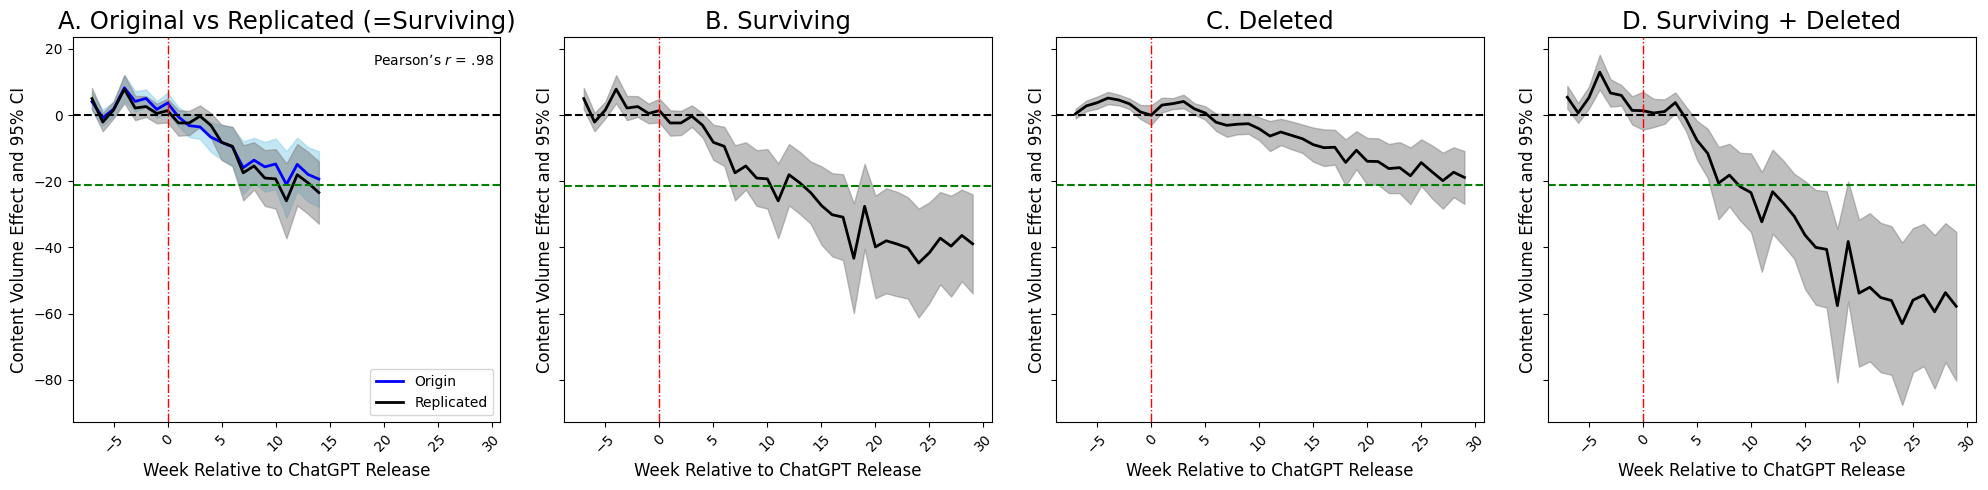

In [66]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 4, figsize = (20, 5), sharey=sharey, sharex=sharex)


axs[0].fill_between(df_coefs['period'], df_coefs['ll_95'], df_coefs['ul_95'], color='skyblue', alpha=0.5)
axs[0].plot(df_coefs['period'], df_coefs['Estimate'], color='blue', linewidth=2, label='Origin')

axs[0].fill_between(cond3_n_df_coefs['period'], cond3_n_df_coefs['ll_95'], cond3_n_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(cond3_n_df_coefs['period'], cond3_n_df_coefs['Estimate'], color='black', linewidth=2, label='Replicated')

axs[0].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[0].axhline(y=0,     color='black',  linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 12)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 12)
axs[0].set_title("A. Original vs Replicated (=Surviving)", fontsize = 17.5)
axs[0].tick_params(axis='x', rotation=45)
axs[0].axhline(y=-21, color='green',  linestyle='--')
axs[0].text(19, 15, s=r'Pearson’s $r$ = ' + corr_value, fontsize = 10) #
axs[0].legend(loc = 'lower right', fontsize = 10, ncols = 1) # add legend
axs[0].grid(False)

axs[1].fill_between(cond3_long_n_df_coefs['period'], cond3_long_n_df_coefs['ll_95'], cond3_long_n_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond3_long_n_df_coefs['period'], cond3_long_n_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].axhline(y=-21.5, color='green',  linestyle='--')
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 12)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 12)
axs[1].set_title("B. Surviving", fontsize = 17.5)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)

axs[2].fill_between(cond3_long_y_df_coefs['period'], cond3_long_y_df_coefs['ll_95'], cond3_long_y_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond3_long_y_df_coefs['period'], cond3_long_y_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].axhline(y=-21, color='green',  linestyle='--')
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 12)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 12)
axs[2].set_title("C. Deleted", fontsize = 17.5)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)


axs[3].fill_between(cond3_long_df_coefs['period'], cond3_long_df_coefs['ll_95'], cond3_long_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[3].plot(cond3_long_df_coefs['period'], cond3_long_df_coefs['Estimate'], color='black', linewidth=2)
axs[3].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[3].axhline(y=0,     color='black',  linestyle='--')
axs[3].axhline(y=-21, color='green',  linestyle='--')
axs[3].set_xlabel("Week Relative to ChatGPT Release", fontsize = 12)
axs[3].set_ylabel("Content Volume Effect and 95% CI", fontsize = 12)
axs[3].set_title("D. Surviving + Deleted", fontsize = 17.5)
axs[3].tick_params(axis='x', rotation=45)
axs[3].grid(False)

fig.tight_layout()
plt.show();

In [67]:
print(cond3_long_n_df_coefs.loc[cond3_long_n_df_coefs['period'] == 29, 'Estimate'])
print(cond3_long_df_coefs.loc[cond3_long_df_coefs['period'] == 29, 'Estimate'])

36   -38.906706
Name: Estimate, dtype: float64
36   -57.755102
Name: Estimate, dtype: float64


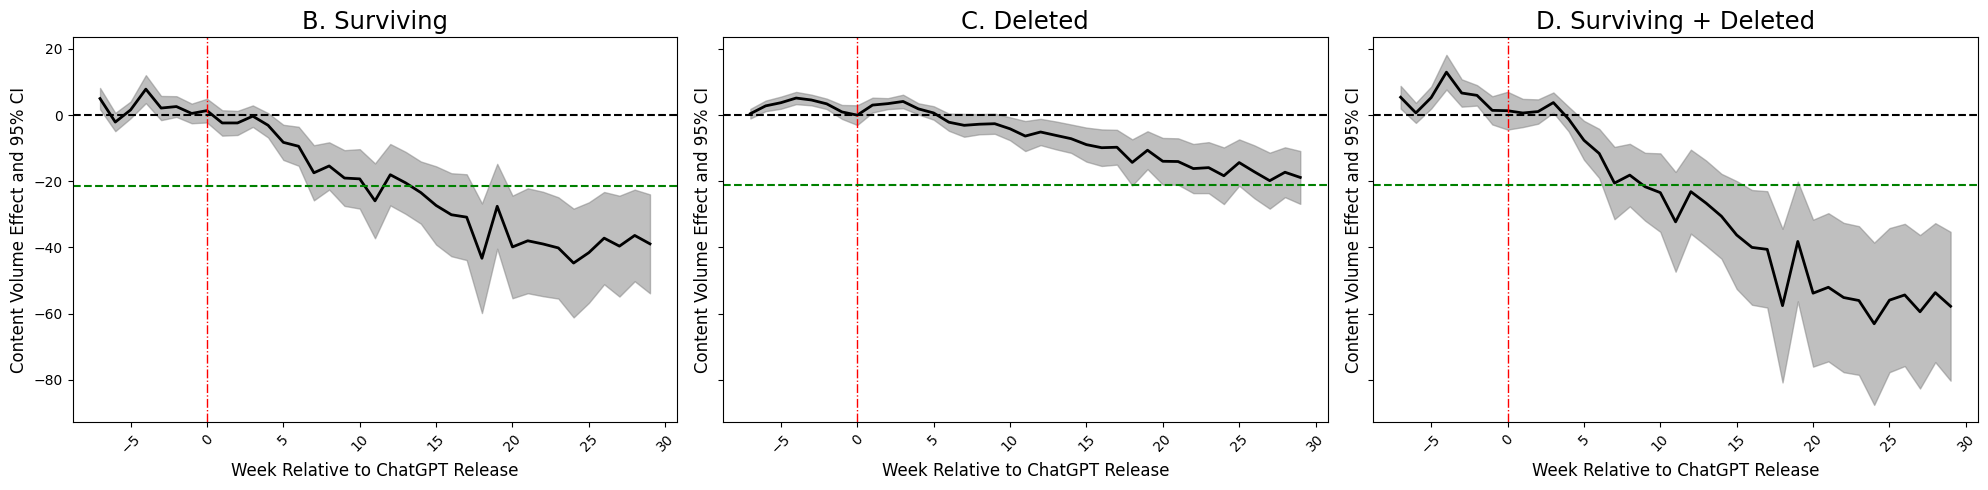

In [ ]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 3, figsize = (20, 5), sharey=sharey, sharex=sharex)



axs[0].fill_between(cond3_long_n_df_coefs['period'], cond3_long_n_df_coefs['ll_95'], cond3_long_n_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(cond3_long_n_df_coefs['period'], cond3_long_n_df_coefs['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[0].axhline(y=0, color='black', linestyle='--')
axs[0].axhline(y=-21.5, color='green',  linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 12)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 12)
axs[0].set_title("A. Surviving", fontsize = 17.5)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)

axs[1].fill_between(cond3_long_y_df_coefs['period'], cond3_long_y_df_coefs['ll_95'], cond3_long_y_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond3_long_y_df_coefs['period'], cond3_long_y_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].axhline(y=-21, color='green',  linestyle='--')
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 12)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 12)
axs[1].set_title("B. Deleted", fontsize = 17.5)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)


axs[2].fill_between(cond3_long_df_coefs['period'], cond3_long_df_coefs['ll_95'], cond3_long_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond3_long_df_coefs['period'], cond3_long_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[2].axhline(y=0,     color='black',  linestyle='--')
axs[2].axhline(y=-21, color='green',  linestyle='--')
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 12)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 12)
axs[2].set_title("C. Surviving + Deleted", fontsize = 17.5)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)

fig.tight_layout()
plt.show();